## <center>EURO-USD Exchange Rates During George Bush, Barack Obama, and Donald Trump

This notebook develops a data visualization of Euro-USD exchange rates. I explore a dataset that describes daily exchange rates for the euro between 1999 and 2021. The dataset was prepared by Daria Chemkaeva using European Central Bank as a source and posted at [Kaggle.com](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020). I focus on Euro-USD exchange rates during the presidency of three US presidents.

The dataset is available under the file name `data.csv` (https://github.com/magorshunov/euro_usd_exchange_visualization/blob/main/data.csv).

In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
warnings.filterwarnings('ignore')
exchange_rates = pd.read_csv('data.csv')
exchange_rates.sample(5)

,Period\Unit:,[Argentine peso ],[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],...,[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[New Taiwan dollar ],[US dollar ],[South African rand ]
5747,1999-07-05,NaN,1.5370,NaN,NaN,1.4985,1.6055,NaN,0.57737,36.188,...,25.0273,8.7015,1.7370,196.4825,45.169,37.7635,0.4353,NaN,1.0232,6.1583
5792,1999-05-03,NaN,1.5987,NaN,NaN,1.5415,1.6111,NaN,0.57867,37.507,...,26.2016,8.9185,1.8015,193.5050,44.896,39.1701,0.4153,NaN,1.0589,6.4308
1605,2015-06-15,10.14190,1.4466,1.9558,3.5134,1.3845,1.0512,6.9653,NaN,27.279,...,61.5060,9.1780,1.5107,NaN,NaN,37.8180,3.0738,34.704,1.1218,13.9372
4321,2004-12-21,3.97000,1.7476,1.9559,3.6050,1.6424,1.5403,11.0862,0.57880,30.493,...,37.2982,8.9695,2.1983,239.7900,38.565,52.2660,1.8620,43.306,1.3394,7.5914
4108,2005-10-14,3.56000,1.5982,1.9562,2.7153,1.4209,1.5506,9.7067,0.57310,29.674,...,34.3380,9.4369,2.0298,239.5100,38.925,49.0780,1.6499,40.136,1.1999,7.9202


In [3]:
#Data clearning
exchange_rates.rename(columns={'[US dollar ]': 'USD', 'Period\\Unit:': 'Time'}, inplace=True) #Rename column names for easing typing
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time']) # changing Time column to datetime type
exchange_rates.sort_values('Time', inplace=True) 
exchange_rates.reset_index(drop=True, inplace=True) # reseting the index

dollar = exchange_rates[['USD', 'Time']].copy() #isolating Time & USD columns
dollar = dollar.loc[dollar['USD'] != '-'] #dropping all rows with '-'
dollar['USD'] = dollar['USD'].astype('float')
dollar['rolling_mean'] = dollar['USD'].rolling(30).mean()

In [4]:
#Slicing dataset by period of presedency
bush = dollar.copy()[(dollar['Time'].dt.year >= 2001) & (dollar['Time'].dt.year < 2009)]
obama = dollar.copy()[(dollar['Time'].dt.year >= 2009) & (dollar['Time'].dt.year < 2017)]
trump = dollar.copy()[(dollar['Time'].dt.year >= 2017)& (dollar['Time'].dt.year < 2021)]

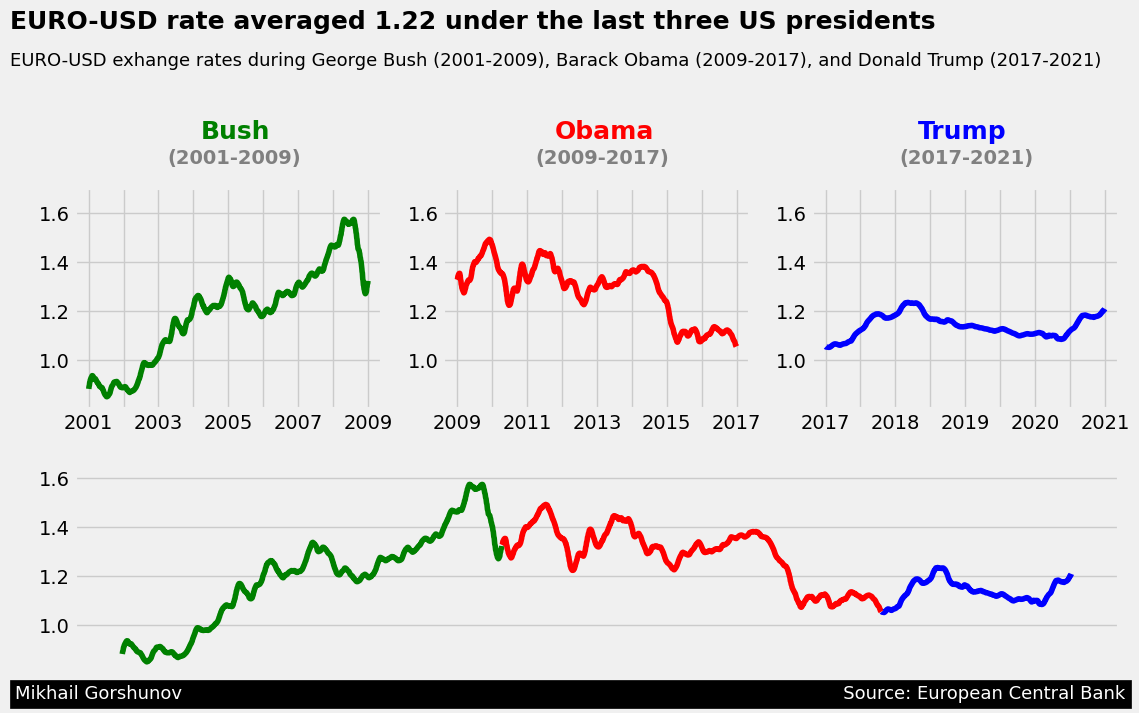

In [8]:
# Adding plots
style.use('fivethirtyeight')

plt.figure(figsize=(12,6))
ax1=plt.subplot(2,3,1)
ax2=plt.subplot(2,3,2)
ax3=plt.subplot(2,3,3)
ax4=plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.set_ylim(bottom=0.8, top=1.7) #setting y-limits
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    
# Bush
ax1.plot(bush['Time'], bush['rolling_mean'], color='green')
ax1.set_xticklabels(['', '2001','', '2003','', '2005','', '2007','', '2009'])
ax1.text(12500, 1.9, 'Bush', fontsize=18, weight='bold', color='green')
ax1.text(12150, 1.8, '(2001-2009)', weight='bold', color='gray')
    
# Obama
ax2.plot(obama['Time'], obama['rolling_mean'], color='red')
ax2.set_xticklabels(['', '2009','', '2011','', '2013','', '2015','', '2017'])
ax1.text(16200, 1.9, 'Obama', fontsize=18, weight='bold', color='red')
ax1.text(16000, 1.8, '(2009-2017)', weight='bold', color='gray')

# Trump
ax3.plot(trump['Time'], trump['rolling_mean'], color='blue')
ax3.set_xticklabels(['2017','', '2018','', '2019','', '2020','','2021'])
ax1.text(20000, 1.9, 'Trump', fontsize=18, weight='bold', color='blue')
ax1.text(19800, 1.8, '(2017-2021)', weight='bold', color='gray')

# Bush-Obama-Trump
ax4.plot(bush['Time'], bush['rolling_mean'], color='green')
ax4.plot(obama['Time'], obama['rolling_mean'], color='red')
ax4.plot(trump['Time'], trump['rolling_mean'], color='blue')
ax4.set_xticks([])

#Title
ax1.text(10500, 2.2, 'EURO-USD exhange rates during George Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021) ', fontsize=13)
ax1.text(10500, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',fontsize=18, weight='bold')

#Adding signature
ax4.text(10500, 0.7, 'Mikhail Gorshunov' + ' '*115 + 'Source: European Central Bank', color='white', backgroundcolor='black', size=13)


plt.show()